- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
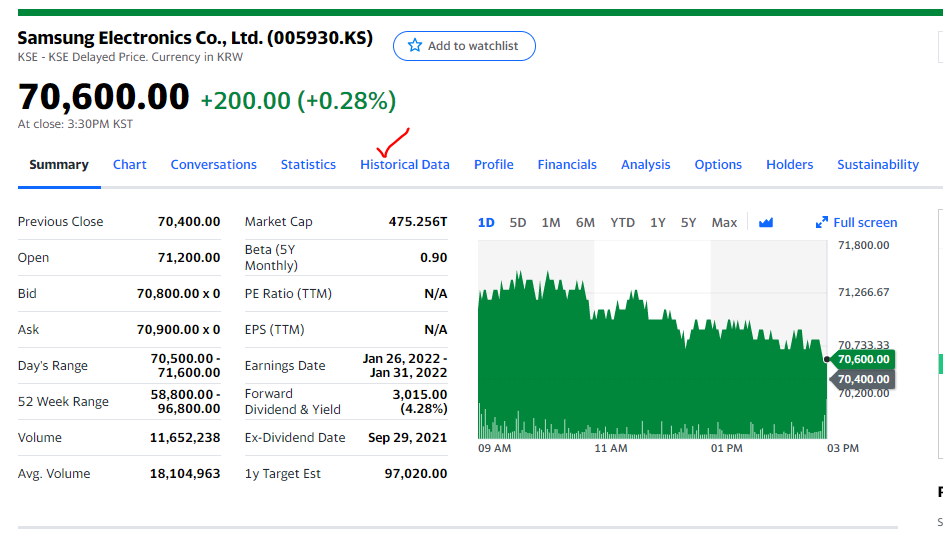

- 기간 선택 후 Apply -> Download 클릭
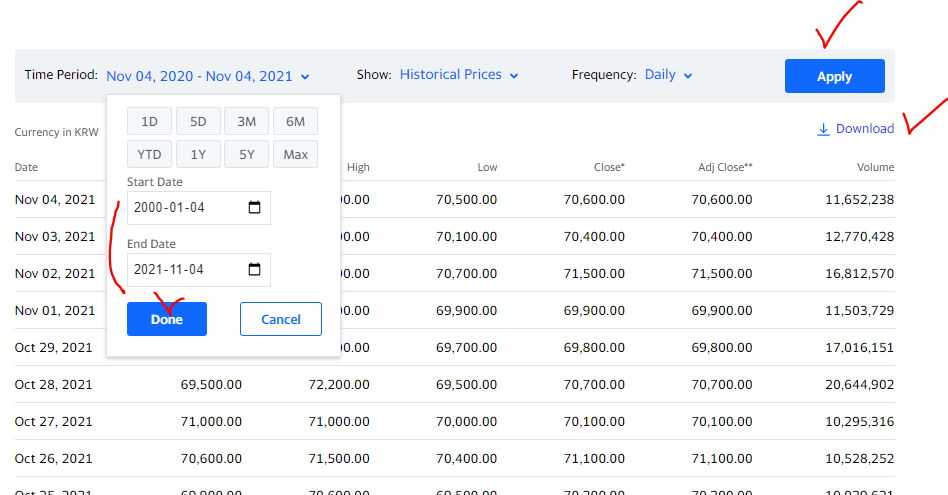

##### Data Loading 및 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('005930.KS.csv')
df.shape

(5800, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4563.385254,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4167.542480,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4197.415039,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4137.668945,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4309.447754,46880000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5795,2023-02-06,62800.0,63000.0,61600.0,61600.0,61600.0,144104
5796,2023-02-07,61900.0,62500.0,61600.0,62000.0,62000.0,32873
5797,2023-02-08,62800.0,63300.0,62400.0,63100.0,63100.0,42558
5798,2023-02-09,63000.0,63300.0,62300.0,63300.0,63300.0,48035
5799,2023-02-10,62600.0,63000.0,62400.0,62800.0,62800.0,9784994


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5800 non-null   object 
 1   Open       5800 non-null   float64
 2   High       5800 non-null   float64
 3   Low        5800 non-null   float64
 4   Close      5800 non-null   float64
 5   Adj Close  5800 non-null   float64
 6   Volume     5800 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 317.3+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5.800000e+03
mean,25959.698276,26219.389655,25694.294828,25954.096552,22483.974956,2.151149e+07
std,20699.663011,20869.306659,20521.599633,20684.298483,20161.772382,1.531437e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2038.959229,0.000000e+00
25%,10340.000000,10500.000000,10200.000000,10360.000000,7842.148926,1.175358e+07
50%,17700.000000,17900.000000,17450.000000,17700.000000,13986.277832,1.749108e+07
75%,39250.000000,39600.000000,38882.500000,39315.000000,34039.742188,2.670571e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,87219.468750,1.642150e+08


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.loc[df.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume


##### 전처리
- date를 index
- Adj Close 컬럼 제거
- MinMaxScaling

In [9]:
# Date: obj(string) =변환=> Datetime
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5800 non-null   datetime64[ns]
 1   Open       5800 non-null   float64       
 2   High       5800 non-null   float64       
 3   Low        5800 non-null   float64       
 4   Close      5800 non-null   float64       
 5   Adj Close  5800 non-null   float64       
 6   Volume     5800 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 317.3 KB


In [10]:
# Date를 index로 만들기. index(행이름)을 datetime 타입으로 사용=>시계열 데이터.
df.set_index('Date', inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4563.385254,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4167.542480,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4197.415039,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4137.668945,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4309.447754,46880000


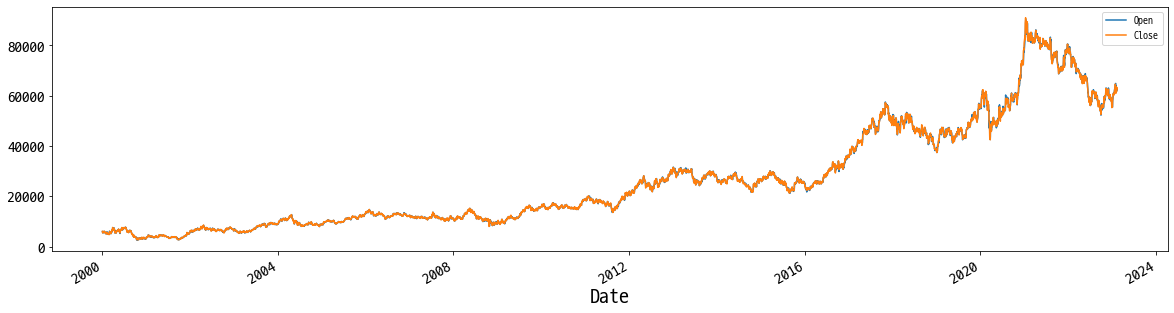

In [12]:
df[['Open', 'Close']].plot(figsize=(20,5));

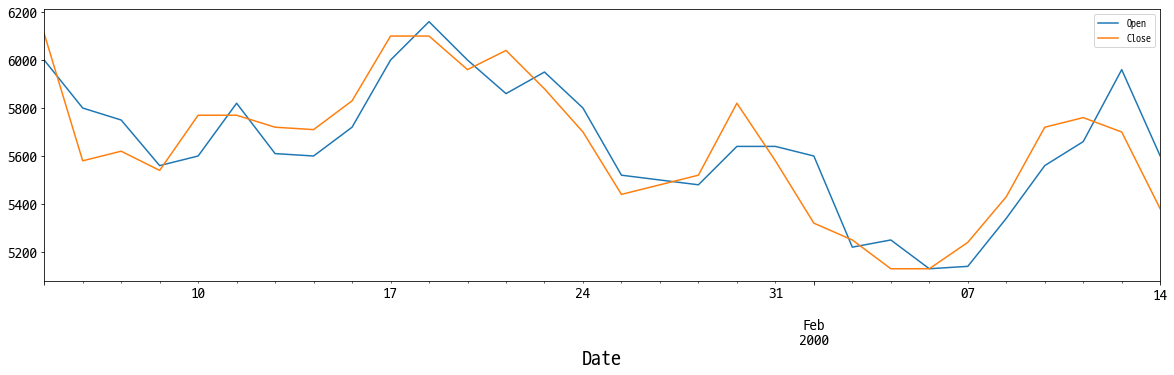

In [13]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(20,5));

In [14]:
df.drop(columns=['Adj Close'], inplace=True)

In [15]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000


### X, y 분리

In [16]:
df_y = df['Close'].to_frame()  #Series(1차원배열)로 조회한 것을 DataFrame으로 변환(2차원배열)

df_X = df   

In [17]:
df_y

,Close
Date,
2000-01-04,6110.0
2000-01-05,5580.0
2000-01-06,5620.0
2000-01-07,5540.0
2000-01-10,5770.0
...,...
2023-02-06,61600.0
2023-02-07,62000.0
2023-02-08,63100.0


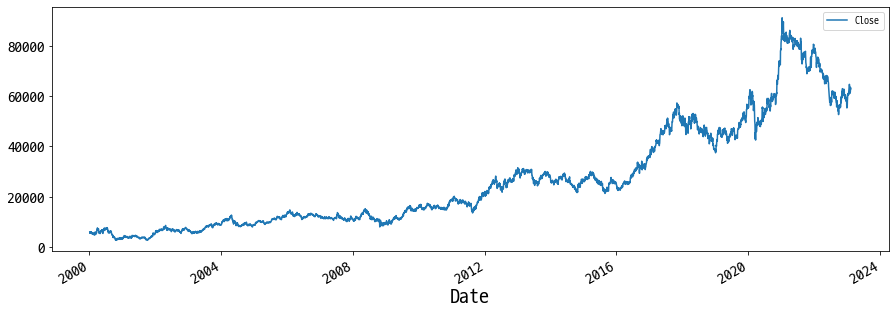

In [18]:
df_y.plot(figsize=(15,5));

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X = scaler_X.fit_transform(df_X)
y = scaler_Y.fit_transform(df_y)

In [20]:
X.min(axis=0), X.max(axis=0)

(array([0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1.]))

In [21]:
y.min(axis=0), y.max(axis=0)

(array([0.]), array([1.]))

##  날짜 종가 예측
- X: 50일치 주가(ex:1일 ~ 50일), y: 51일째 주가. (ex: 51일)
    - 50일의 연속된 주식가격을 할습하여 51일째 주가를 예측한다.
    - X의 한개의 데이터가 50일치 주가가 된다.
<br>

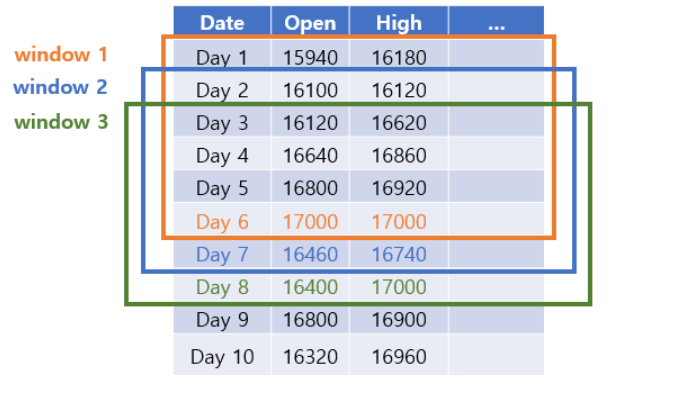
<center>[연속된 날짜가 5인 경우]</center>

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [22]:
print(X.shape, y.shape, type(X), y.size, len(y))

(5800, 5) (5800, 1) <class 'numpy.ndarray'> 5800 5800


##### input sequence dataset 만들기

In [23]:
window_size = 50
data_X = []
data_y = []

for i in range(0, y.size-window_size):
    _X = X[i:i+window_size]
    _y = y[i+window_size]
    data_X.append(_X)
    data_y.append(_y)

In [24]:
np.shape(data_X), np.shape(data_y)

((5750, 50, 5), (5750, 1))

## Train, Test 분리
- Train : 8, Test: 2의 비율로 나눈다.

In [25]:
train_size = int(len(data_y) * 0.8)
test_size = len(data_y) - train_size
print(train_size, test_size, train_size+test_size)

4600 1150 5750


In [26]:
X_train = np.array(data_X[:train_size])
X_test = np.array(data_X[train_size:])

y_train = np.array(data_y[:train_size])
y_test = np.array(data_y[train_size:])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4600, 50, 5), (1150, 50, 5), (4600, 1), (1150, 1))

##### import

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 정의

In [28]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

##### Dataset 생성 

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

## Model 생성

- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Fully Connected Layer(Dense)와 연결된 경우 return_sequence=False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

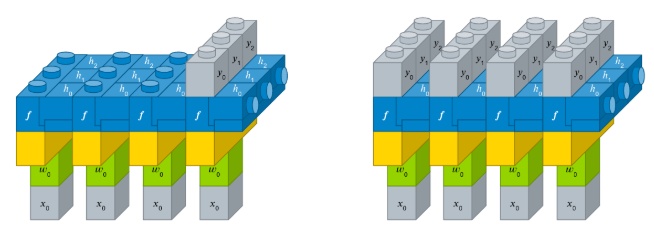

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

##### 모델 생성, 컴파일

In [30]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(window_size, 5)))
#     Feature Extractor
    model.add(keras.layers.LSTM(32, return_sequences = True, activation="tanh"))            
    model.add(keras.layers.LSTM(32, return_sequences = False, activation="tanh"))            
#     추론기
    model.add(keras.layers.Dense(32, activation='relu'))
#     output layer -  예측대상: 1개(close 주식가격) - 회귀: activation: None
    model.add(keras.layers.Dense(1)) 
    
    return model

In [31]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________


##### 모델 학습, 평가

In [32]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/100
46/46 [==============================] - 4s 37ms/step - loss: 0.0072 - val_loss: 0.0026
Epoch 2/100
46/46 [==============================] - 1s 22ms/step - loss: 1.7060e-04 - val_loss: 0.0018
Epoch 3/100
46/46 [==============================] - 1s 23ms/step - loss: 1.0830e-04 - val_loss: 0.0018
Epoch 4/100
46/46 [==============================] - 1s 22ms/step - loss: 9.8971e-05 - val_loss: 0.0021
Epoch 5/100
46/46 [==============================] - 1s 22ms/step - loss: 8.8553e-05 - val_loss: 0.0015
Epoch 6/100
46/46 [==============================] - 1s 23ms/step - loss: 8.3932e-05 - val_loss: 0.0016
Epoch 7/100
46/46 [==============================] - 1s 24ms/step - loss: 8.3024e-05 - val_loss: 0.0016
Epoch 8/100
46/46 [==============================] - 1s 22ms/step - loss: 8.0017e-05 - val_loss: 0.0015
Epoch 9/100
46/46 [==============================] - 1s 23ms/step - loss: 8.1683e-05 - val_loss: 0.0014
Epoch 10/100
46/46 [==============================] - 1s 23ms/step -

Epoch 78/100
46/46 [==============================] - 1s 27ms/step - loss: 3.6319e-05 - val_loss: 0.0012
Epoch 79/100
46/46 [==============================] - 1s 25ms/step - loss: 3.5246e-05 - val_loss: 0.0013
Epoch 80/100
46/46 [==============================] - 1s 23ms/step - loss: 4.0118e-05 - val_loss: 5.9148e-04
Epoch 81/100
46/46 [==============================] - 1s 23ms/step - loss: 4.0935e-05 - val_loss: 8.9901e-04
Epoch 82/100
46/46 [==============================] - 1s 23ms/step - loss: 3.8353e-05 - val_loss: 0.0011
Epoch 83/100
46/46 [==============================] - 1s 22ms/step - loss: 3.3876e-05 - val_loss: 6.8977e-04
Epoch 84/100
46/46 [==============================] - 1s 23ms/step - loss: 3.7921e-05 - val_loss: 6.8385e-04
Epoch 85/100
46/46 [==============================] - 1s 22ms/step - loss: 4.7728e-05 - val_loss: 0.0014
Epoch 86/100
46/46 [==============================] - 1s 23ms/step - loss: 4.4135e-05 - val_loss: 7.3428e-04
Epoch 87/100
46/46 [===============

##### 결과 시각화

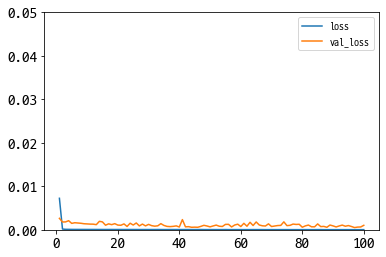

In [33]:
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(0,0.05)
plt.show()

##### 최종평가

In [34]:
test_loss = model.evaluate(X_test, y_test)

36/36 [==============================] - 1s 7ms/step - loss: 0.0010


##### 다음날 주가 예측
- 마지막 50일치로 내일 주가를 예측해 본다.

In [35]:
new_data = X[-50:]
new_data = new_data[np.newaxis, ...]

new_data.shape

(1, 50, 5)

In [36]:
pred = model.predict(new_data)

1/1 [==============================] - 1s 582ms/step


In [37]:
pred

array([[0.6640286]], dtype=float32)

In [38]:
scaler_Y.inverse_transform(pred) 

array([[61343.805]], dtype=float32)

In [39]:
df = pd.DataFrame(scaler_Y.inverse_transform(pred) , columns = ['prediction'])

df

,prediction
0,61343.804688
